# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Datasets

In [2]:
dim_customers=pd.read_csv("dim_customers.csv")
dim_customers.head()

,customer_id,age_group,city,occupation,gender,marital status,avg_income
0,ATQCUS1825,45+,Bengaluru,Salaried IT Employees,Male,Married,73523
1,ATQCUS0809,25-34,Hyderabad,Salaried Other Employees,Male,Married,39922
2,ATQCUS0663,25-34,Chennai,Salaried Other Employees,Male,Married,37702
3,ATQCUS0452,25-34,Delhi NCR,Government Employees,Male,Married,54090
4,ATQCUS3350,21-24,Bengaluru,Freelancers,Male,Single,28376


In [3]:
fact_spends=pd.read_csv("fact_spends.csv")
fact_spends.head()

,customer_id,month,category,payment_type,spend
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114
1,ATQCUS0368,October,Groceries,Credit Card,1466
2,ATQCUS0595,May,Health & Wellness,Credit Card,387
3,ATQCUS0667,October,Electronics,Credit Card,1137
4,ATQCUS3477,September,Bills,UPI,2102


# Basic Data Exploration for both datasets

In [4]:
dim_customers.shape

(4000, 7)

In [5]:
dim_customers.duplicated().any()

False

In [6]:
dim_customers.isnull().sum()

customer_id       0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
dtype: int64

In [7]:
dim_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     4000 non-null   object
 1   age_group       4000 non-null   object
 2   city            4000 non-null   object
 3   occupation      4000 non-null   object
 4   gender          4000 non-null   object
 5   marital status  4000 non-null   object
 6   avg_income      4000 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 218.9+ KB


In [8]:
fact_spends.shape

(864000, 5)

In [9]:
fact_spends.duplicated().any()

False

In [10]:
fact_spends.isnull().sum()

customer_id     0
month           0
category        0
payment_type    0
spend           0
dtype: int64

In [11]:
fact_spends.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   customer_id   864000 non-null  object
 1   month         864000 non-null  object
 2   category      864000 non-null  object
 3   payment_type  864000 non-null  object
 4   spend         864000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 33.0+ MB


## Exploratory Data Analysis

In [12]:
# setting default values for all plots
plt.style.use("fivethirtyeight")
font1 = {'family':'serif','size':18}
font2 = {'family':'serif','size':10}

### Customer Distribution by Age-Group

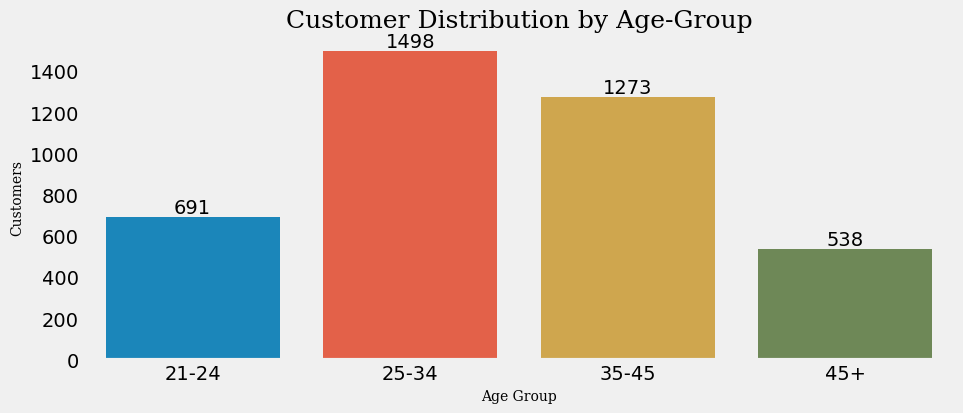

In [13]:
df=dim_customers["age_group"].value_counts().reset_index()

df=df.iloc[[2,0,1,3],:]  # resetting the rows order

plt.figure(figsize=(10,4))

sns.barplot(data=df,x=df["age_group"],y=df["count"])

for i,v in enumerate(df["count"]):
    plt.text(i,v,str(v),ha="center",va="bottom")

plt.title("Customer Distribution by Age-Group",fontdict=font1)
plt.xlabel("Age Group",fontdict=font2)
plt.ylabel("Customers",fontdict=font2)
plt.grid(False)
plt.show()

#### The **25-34 age group** dominates the customer base, followed by **35-45**, indicating strong engagement from professionals. The **21-24 segment** shows moderate interest, while **45+** has the lowest representation, suggesting opportunities for targeted outreach.

## Customer Distribution by Gender

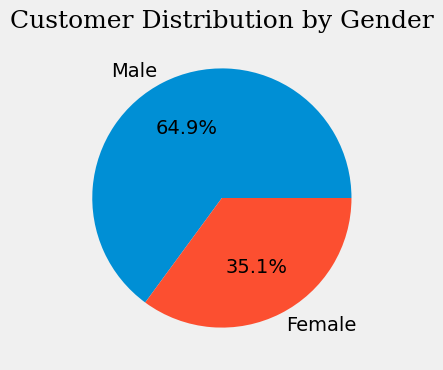

In [14]:
df=dim_customers["gender"].value_counts()

plt.figure(figsize=(10,4))

plt.pie(df,labels=["Male","Female"],autopct="%1.1f%%")

plt.title("Customer Distribution by Gender",fontdict=font1)
plt.show()

#### Males constitute **64.9%** of the customer base, while females account for **35.1%**, indicating a strong male dominance. Marketing efforts can focus on **maintaining male engagement** while exploring strategies to **increase female participation** through targeted campaigns.

## Customer Distribution by Occupation

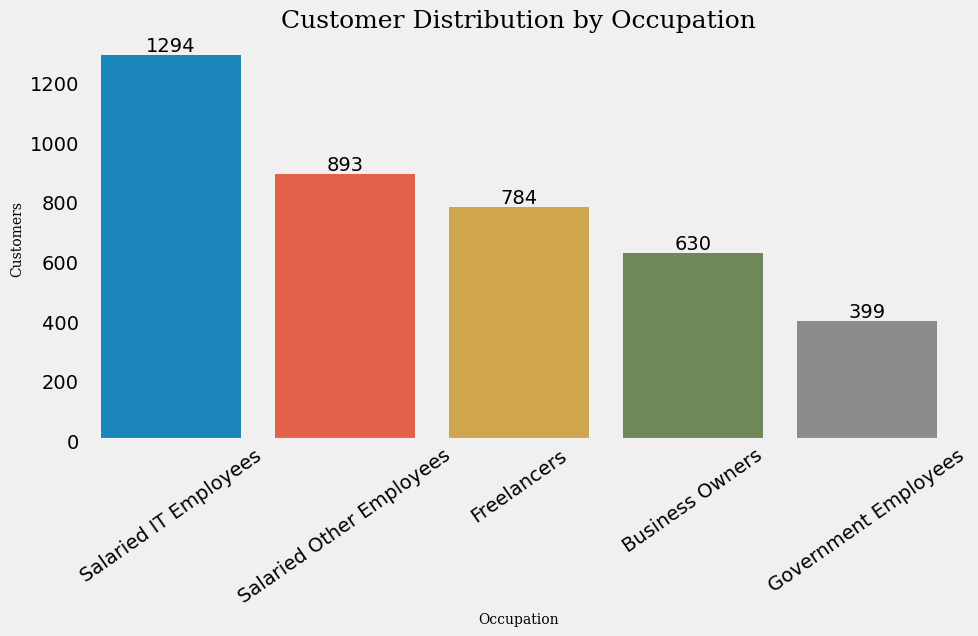

In [15]:
df=dim_customers["occupation"].value_counts().reset_index()

plt.figure(figsize=(10,5))

sns.barplot(data=df,x=df["occupation"],y=df["count"])

for i,v in enumerate(df["count"]):
    plt.text(i,v,str(v),ha="center",va="bottom")

font1 = {'family':'serif','size':18}
font2 = {'family':'serif','size':10}

plt.title("Customer Distribution by Occupation",fontdict=font1)
plt.xlabel("Occupation",fontdict=font2)
plt.ylabel("Customers",fontdict=font2)
plt.grid(False)
plt.xticks(rotation=35)
plt.show()

#### Salaried IT employees form the largest customer segment (32.4%), followed by other salaried employees (22.3%) and freelancers (19.6%). Business owners (15.8%) and government employees (10.0%) contribute less, suggesting an opportunity to expand engagement in these sectors through tailored marketing strategies.

## Customer Distribution by City and Occupation

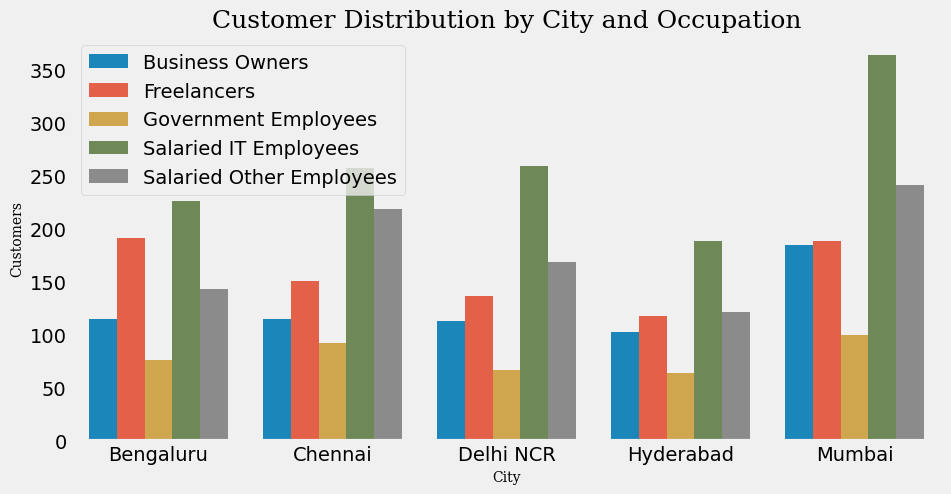

In [16]:
df=dim_customers.groupby(["city","occupation"])["customer_id"].count().reset_index().rename(columns={"customer_id":"customers"})
df.head()

plt.figure(figsize=(10,5))
sns.barplot(data=df,x="city",y="customers",hue="occupation")

plt.title("Customer Distribution by City and Occupation",fontdict=font1)
plt.xlabel("City",fontdict=font2)
plt.ylabel("Customers",fontdict=font2)
plt.legend(loc="best")
plt.grid(False)
plt.show()

#### Mumbai and Delhi NCR have the highest **salaried IT employees**, while freelancers and business owners are **evenly distributed** across cities. **Government employees** form the smallest segment, indicating potential for targeted engagement. Chennai has a **strong salaried workforce**, and Bengaluru & Hyderabad are **key tech-driven markets**.

## Average Income Distribution by Age-Group

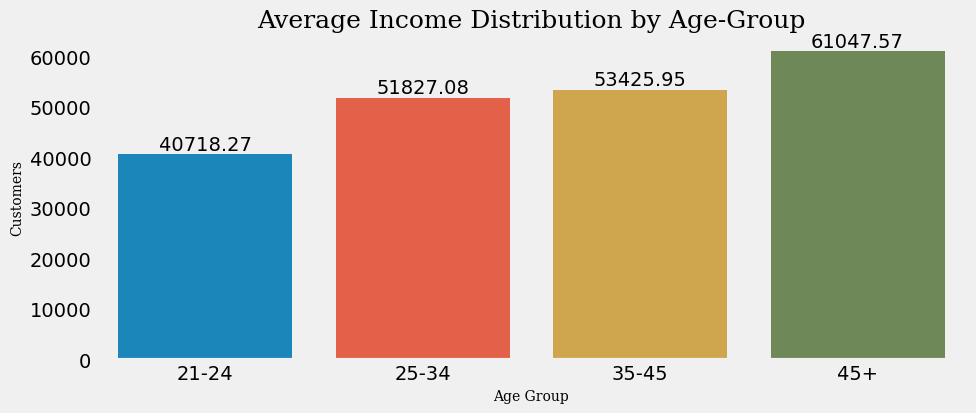

In [17]:
df=dim_customers.groupby("age_group")["avg_income"].mean().reset_index().round(2)

plt.figure(figsize=(10,4))

sns.barplot(data=df,x=df["age_group"],y=df["avg_income"])


for i,v in enumerate(df["avg_income"]):
    plt.text(i,v,str(v),ha="center",va="bottom")

font1 = {'family':'serif','size':18}
font2 = {'family':'serif','size':10}

plt.title("Average Income Distribution by Age-Group",fontdict=font1)
plt.xlabel("Age Group",fontdict=font2)
plt.ylabel("Customers",fontdict=font2)
plt.grid(False)
plt.show()

#### Average income **increases with age**, with the **45+ group earning the highest (₹61,047.57)**, followed by **35-45 (₹53,425.95)** and **25-34 (₹51,827.08)**. The **21-24 group has the lowest income (₹40,718.27)**, indicating they are early in their careers with lower purchasing power.

## Average Income Distribution by City and Occupation

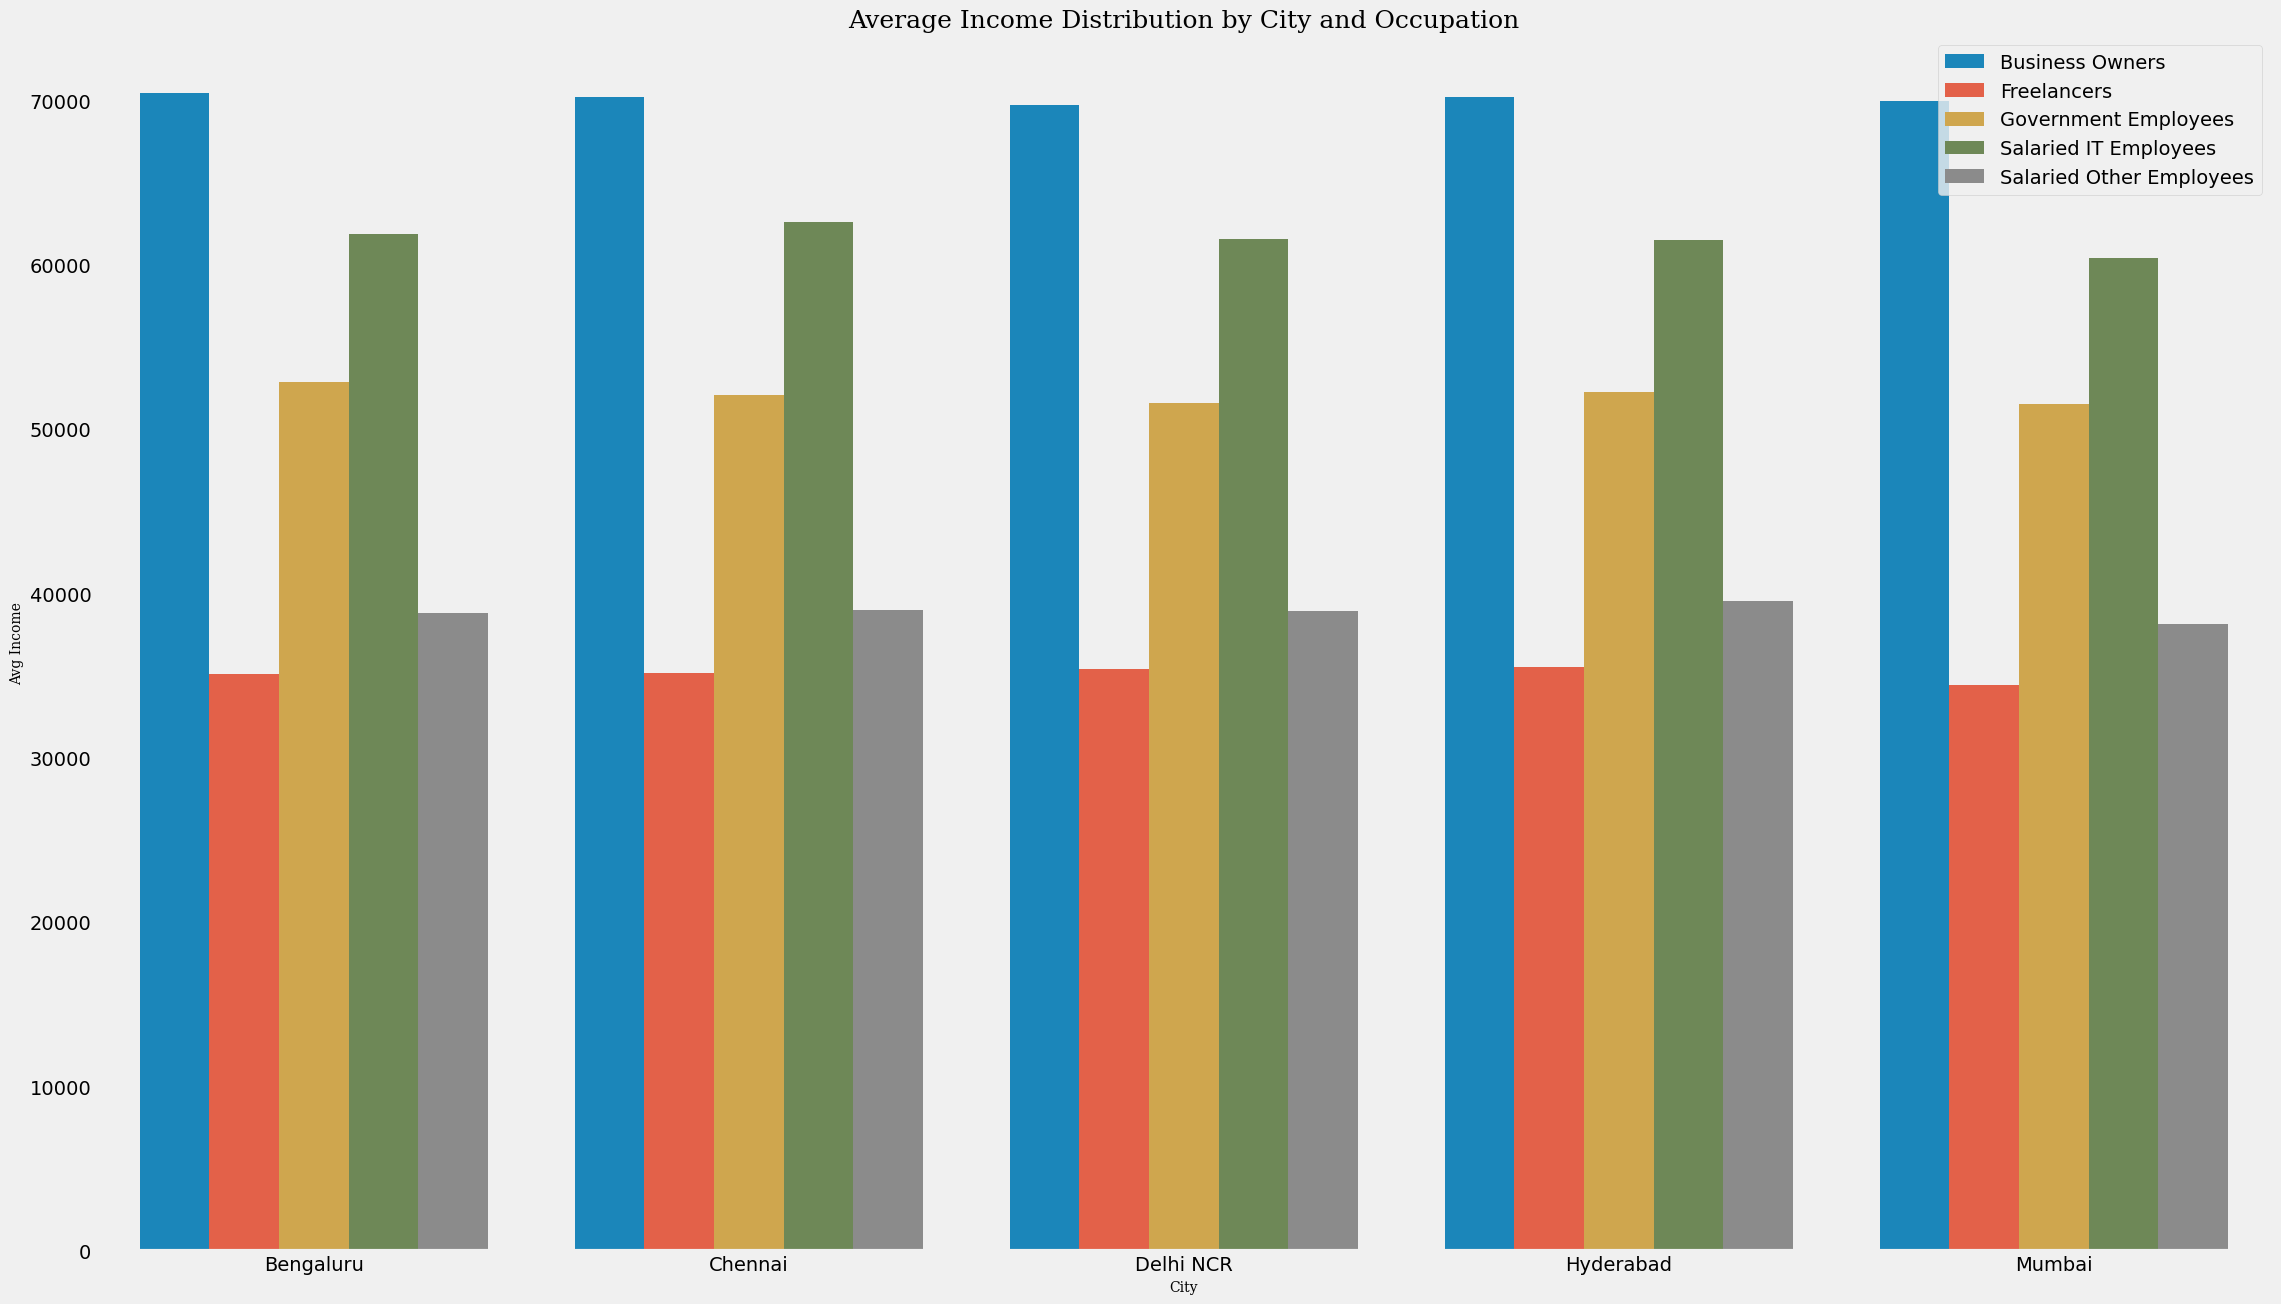

In [18]:
df=dim_customers.groupby(["city","occupation"])["avg_income"].mean().reset_index().round(2)

plt.figure(figsize=(25,15))

sns.barplot(data=df,x="city",y="avg_income",hue="occupation")

plt.title("Average Income Distribution by City and Occupation",fontdict=font1)
plt.xlabel("City",fontdict=font2)
plt.ylabel("Avg Income",fontdict=font2)
plt.legend(loc="best")
plt.grid(False)
plt.show()

####  Business owners have the highest average income, around 70,000 across cities, followed by salaried IT employees, earning between 60,000 and 62,000. Government employees earn approximately 51,000 to 52,000, while freelancers have the lowest earnings, ranging from 34,000 to 35,000, with Mumbai having the lowest freelancer income.

## Total Spend by Age Group

In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df=df.groupby("age_group")["spend"].sum().reset_index()

plt.figure(figsize=(10,5))

sns.barplot(data=df,x="age_group",y="spend")
    
plt.title("Total Spend by Age Group",fontdict=font1)
plt.xlabel("Age Group",fontdict=font2)
plt.ylabel("Spend",fontdict=font2)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')  
plt.grid(False)
plt.show()

#### The 25-34 age group has the highest total spending, followed closely by the 35-45 age group, indicating strong purchasing power in these segments. The 21-24 and 45+ age groups contribute significantly less, suggesting lower spending capacity or different consumption patterns.

## Average Spend by Months

In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df=df.groupby("month")["spend"].sum().reset_index()
df=df.iloc[[3,2,1,0,5,4],:]

plt.figure(figsize=(10,5))

sns.barplot(data=df,x="month",y="spend")

plt.title("Average Spend by Months",fontdict=font1)
plt.xlabel("Months",fontdict=font2)
plt.ylabel("Spend",fontdict=font2)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')  
plt.grid(False)

#### Spending peaks in September, followed by August and October, indicating higher consumer activity during these months. May and June have relatively lower spending, suggesting seasonal trends or promotional influences.

## Total Spend by City

In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df=df.groupby("city")["spend"].sum()

plt.figure(figsize=(10,5))

plt.pie(df,labels=df.index,autopct="%1.1f%%")

plt.title("Total Spend by City",fontdict=font1)
plt.show()

#### Mumbai has the highest total spend, followed by Delhi NCR and Bengaluru. Chennai and Hyderabad have comparatively lower spending. This indicates Mumbai as the most significant market for spending.

## Total Spend by Category and Payment Type

In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df=df.groupby(["category","payment_type"])["spend"].sum().reset_index()

plt.figure(figsize=(10,5))

sns.barplot(data=df,x="category",y="spend",hue="payment_type")

plt.title("Total Spend by Category and Payment Type",fontdict=font1)
plt.xlabel("Category",fontdict=font2)
plt.ylabel("Spend",fontdict=font2)
plt.xticks(rotation=45)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

#### Bills and electronics have the highest spending, with credit cards being the most preferred payment method. Groceries and health & wellness also see significant spending, especially via UPI. Travel and entertainment spending are moderate, with a mix of payment methods. Net banking is the least used payment option across all categories.

## Total Spend by Category and City

In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df=df.groupby(["category","city"])["spend"].sum().reset_index()

plt.figure(figsize=(10,5))

sns.barplot(data=df,x="category",y="spend",hue="city")

plt.title("Total Spend by Category and City",fontdict=font1)
plt.xlabel("Category",fontdict=font2)
plt.ylabel("Spend",fontdict=font2)
plt.xticks(rotation=45)

# Disable scientific notation
plt.ticklabel_format(style='plain', axis='y')  
plt.show()

#### Mumbai has the highest spending across all categories, especially in bills, electronics, and groceries. Delhi NCR and Bengaluru also show strong spending, particularly in travel and health & wellness. Chennai and Hyderabad have relatively lower spending, with Hyderabad having the least in most categories. Apparel and entertainment spending are the lowest across all cities.

## Average Monthly Income and Average Monthly Spend by Months

In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df.head(3)

In [ ]:
df1=df.groupby(["month"])["avg_income"].mean()
df1=df1.reset_index()
df1

In [ ]:
df2=df.groupby(["customer_id","month"])["spend"].sum().groupby("month").mean()
df2

In [ ]:
df=pd.merge(left=df1,right=df2,on="month",how="inner")
df=df.iloc[[3,2,1,0,5,4],:]

plt.figure(figsize=(10,5))

plt.plot(df["month"],df["avg_income"])
plt.plot(df["month"],df["spend"])
plt.legend(["Average Monthly Income","Average Monthly Spend"])


plt.title("Average Monthly Income and Average Monthly Spend by Months")
plt.xlabel("Month",fontdict=font2)
plt.ylabel("Spend",fontdict=font2)
plt.show()

#### Spending shows an increasing trend from May to September, peaking in September before slightly declining in October. Despite a constant average income, spending varies, indicating seasonal or event-driven expenses. The highest jump occurs between July and August, suggesting increased spending patterns during that period. The drop in October may indicate post-event savings or reduced discretionary spending.

## Categories and Payment Type by Total Spend (All values are in Millions Rupees)


In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df.head(3)

In [ ]:
df=df.pivot_table(values="spend", index="category", columns="payment_type", aggfunc="sum")/1000000
df=df.round(2)
df

#### Bills have the highest spending, mostly via credit cards. Groceries see high UPI usage, while Electronics and Travel rely more on credit cards. Net Banking is the least preferred across all categories.

## Average Income and Average Spend by Cities

In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df.head(3)

In [ ]:
df1=df.groupby("city")["avg_income"].mean().reset_index()
df1

In [ ]:
df2=df.groupby(["customer_id","month","city"])["spend"].sum().groupby("city").mean().reset_index()
df2

In [ ]:
df=pd.merge(left=df1,right=df2,on="city",how="inner")
df

In [ ]:
plt.figure(figsize=(10,5))

plt.bar(df["city"],df["avg_income"])
plt.bar(df["city"],df["spend"])

plt.title("Average Income and Average Spend by Cities",fontdict=font1)
plt.xlabel("City",fontdict=font2)
plt.ylabel("Spend / Income ",fontdict=font2)
plt.legend(["Average Monthly Income","Average Monthly Spend"])

plt.show()

#### People in Mumbai and Delhi NCR spend the most, while Chennai and Hyderabad have lower spending despite similar incomes.

## Income Utilization Percentage by Occupation

In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df.head(3)

In [ ]:
df1=df.groupby("occupation")["avg_income"].mean().reset_index()
df1

In [ ]:
df2=df.groupby(["customer_id","month","occupation"])["spend"].sum().groupby("occupation").mean().reset_index()
df2

In [ ]:
df=pd.merge(left=df1,right=df2,on="occupation",how="inner")
df

In [ ]:
df["income_utlization_pct"]=round(df["spend"]/df["avg_income"]*100,2)

df


In [ ]:
income_utilization_pct = df["income_utlization_pct"] 
occupations = df["occupation"]  

plt.figure(figsize=(10, 5))
plt.pie(x=income_utilization_pct,labels=occupations, autopct=lambda x: f"{x*sum(income_utilization_pct)/100:.1f}%",)

plt.title("Income Utilization Percentage by Occupation", fontdict=font1)
plt.show()

#### Salaried IT Employees and Freelancers have the highest proportion of their income allocated to expenses, suggesting a higher spending pattern. In contrast, Government Employees and Business Owners allocate a smaller share of their income to expenditures, indicating relatively higher savings.

## Monthly spend of customers by category - (All values are in Millions Rupees)


In [ ]:
df=pd.merge(left=dim_customers,right=fact_spends,on="customer_id",how="left")
df.head(1)

In [ ]:
df=df.groupby(["month","category"])["spend"].sum().reset_index()
df.head()

In [ ]:
df=df.pivot_table(values="spend",index="category",columns="month")/1000000
month_order = ["May", "June", "July", "August", "September", "October"]
df = df[month_order]
df=df.round(2)
df 

#### Spending peaks in September across all categories, with Bills, Groceries, and Electronics leading. Apparel and Entertainment see moderate increases, while Others remains the lowest.